# Build Your Neural Networks with Keras in Three Ways

The Keras or more specifically the Models API can be divided into three parts, therefore making it possible to create models in multiple ways. In the following, we will learn how and when to utilize which part of the API.

We’re going to build the same fully connected neural network in three different ways using the good ol’ MNIST dataset.

#Loading Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sn


**Load MNIST dataset**


In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
# pre-process, normalize data
X_train, X_test = X_train / 255.0, X_test / 255.0

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_test.shape

(10000, 28, 28)

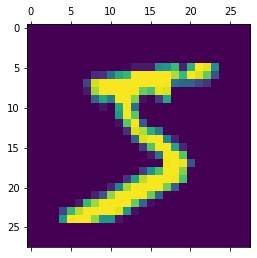

In [ ]:
plt.matshow(X_train[0])

# Sequentail Model

In [ ]:
# get input dimension 28x28 pixels
input_dim = (28, 28)
# get output dimensions 10 classes
output_dim = len(np.unique(y_train))

# create sequential model
model = keras.Sequential()
model.add(layers.Flatten(input_shape=input_dim))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(units=output_dim, activation='softmax'))

In [ ]:
# compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['acc']
)

# train the model
model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# get model summary
model.summary()

Epoch 1/5
422/422 [==============================] - 3s 6ms/step - loss: 0.2639 - acc: 0.9219 - val_loss: 0.1266 - val_acc: 0.9642
Epoch 2/5
422/422 [==============================] - 2s 6ms/step - loss: 0.1009 - acc: 0.9695 - val_loss: 0.0874 - val_acc: 0.9743
Epoch 3/5
422/422 [==============================] - 3s 7ms/step - loss: 0.0675 - acc: 0.9792 - val_loss: 0.0748 - val_acc: 0.9777
Epoch 4/5
422/422 [==============================] - 2s 6ms/step - loss: 0.0495 - acc: 0.9847 - val_loss: 0.0863 - val_acc: 0.9750
Epoch 5/5
422/422 [==============================] - 2s 6ms/step - loss: 0.0399 - acc: 0.9877 - val_loss: 0.0815 - val_acc: 0.9770
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         


In [ ]:
# Make Prediction
y_predicted=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_predicted[0]

array([1.5878241e-04, 1.3437034e-06, 3.7132650e-05, 3.9410908e-04,
       5.6222831e-07, 1.2071503e-04, 5.4853199e-06, 9.9870342e-01,
       4.4467970e-06, 5.7398778e-04], dtype=float32)

In [ ]:
y_predicted_labels=[np.argmax(x) for x in y_predicted]

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
# Evaluate Model 
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0862 - acc: 0.9756


[0.0861918032169342, 0.975600004196167]

In [ ]:
# Confusion Matrix
cm = tf.math.confusion_matrix(y_test,y_predicted_labels)

Text(69.0, 0.5, 'actual')

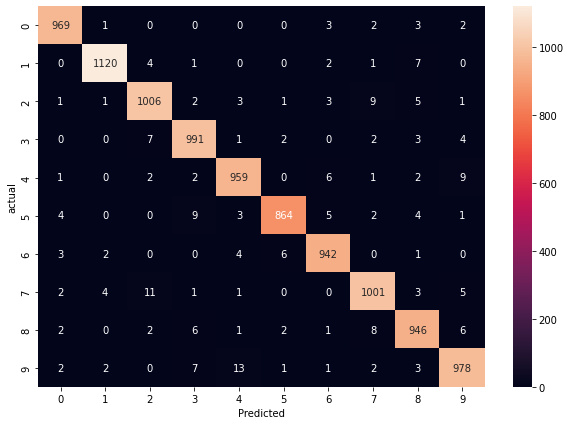

In [ ]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('actual')

# The Functional API

In [ ]:
# create model with functional api
def create_model(input_dim, output_dim):
    inputs = layers.Input(shape=input_dim)
    x = layers.Flatten()(inputs)
    x = layers.Dense(units=128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(units=128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    outputs = layers.Dense(units=output_dim, activation='softmax')(x)
    return keras.Model(inputs=inputs, outputs=outputs)

functiona_model = create_model(input_dim, output_dim)

In [ ]:
# compile the model
functiona_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['acc']
)

# train the model
functiona_model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# get model summary
functiona_model.summary()

Epoch 1/5
422/422 [==============================] - 3s 6ms/step - loss: 0.2554 - acc: 0.9234 - val_loss: 0.1162 - val_acc: 0.9670
Epoch 2/5
422/422 [==============================] - 2s 6ms/step - loss: 0.0992 - acc: 0.9708 - val_loss: 0.1025 - val_acc: 0.9697
Epoch 3/5
422/422 [==============================] - 2s 6ms/step - loss: 0.0671 - acc: 0.9794 - val_loss: 0.0831 - val_acc: 0.9750
Epoch 4/5
422/422 [==============================] - 2s 6ms/step - loss: 0.0495 - acc: 0.9848 - val_loss: 0.0824 - val_acc: 0.9752
Epoch 5/5
422/422 [==============================] - 2s 6ms/step - loss: 0.0390 - acc: 0.9884 - val_loss: 0.0834 - val_acc: 0.9763
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0        

In [ ]:
# Evaluate Model 
functiona_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0863 - acc: 0.9723


[0.0862811803817749, 0.9722999930381775]

In [ ]:
# Make Prediction 
y_predicted=functiona_model.predict(X_test)
y_predicted_labels=[np.argmax(x) for x in y_predicted]
# Confusion Matrix
cm = tf.math.confusion_matrix(y_test,y_predicted_labels)


313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'actual')

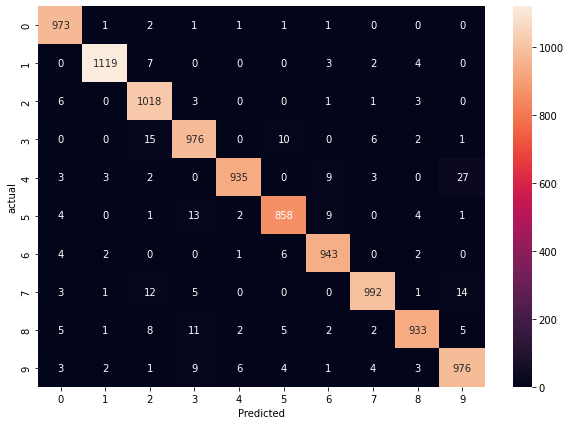

In [ ]:
# Plot CM
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('actual')

# Model Subclassing


In [ ]:
# define custom layer
class DenseBlock(layers.Layer):
    def __init__(self, units, activation='relu'):
        super().__init__()
        self.dense = layers.Dense(units, activation)
        self.bn = layers.BatchNormalization()
    
    def call(self, inputs):
        x = self.dense(inputs)
        x = self.bn(x)
        return x

In [ ]:
# define custom model by subclassing
class FCNN(keras.Model):
    def __init__(self, hidden_layer, output_dim, activation='relu'):
        super().__init__()
        self.hidden_layer = [DenseBlock(units) for units in hidden_layer]
        self.flatten = layers.Flatten()
        self.softmax = layers.Dense(units=output_dim, activation='softmax')
    
    def call(self, inputs):
        x = self.flatten(inputs)
        for layer in self.hidden_layer:
            x = layer(x)
        x = self.softmax(x)
        return x


In [ ]:
# get input dimensions 28x28 pixels
input_dim = (28, 28)
# get output dimensions 10 classes
output_dim = len(np.unique(y_train))
# define layer for fully connected NN
hidden_layer = [128, 128]
# instantiate new model
Subclassing_Model = FCNN(hidden_layer, output_dim)

In [ ]:
# compile the model
Subclassing_Model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['acc']
)

# train the model
Subclassing_Model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# get model summary
Subclassing_Model.summary()

Epoch 1/5
422/422 [==============================] - 3s 6ms/step - loss: 0.2618 - acc: 0.9226 - val_loss: 0.1080 - val_acc: 0.9707
Epoch 2/5
422/422 [==============================] - 2s 6ms/step - loss: 0.0996 - acc: 0.9704 - val_loss: 0.0965 - val_acc: 0.9712
Epoch 3/5
422/422 [==============================] - 2s 6ms/step - loss: 0.0697 - acc: 0.9782 - val_loss: 0.0818 - val_acc: 0.9757
Epoch 4/5
422/422 [==============================] - 2s 6ms/step - loss: 0.0510 - acc: 0.9842 - val_loss: 0.0855 - val_acc: 0.9755
Epoch 5/5
422/422 [==============================] - 2s 6ms/step - loss: 0.0368 - acc: 0.9884 - val_loss: 0.0762 - val_acc: 0.9787
Model: "fcnn_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_block_2 (DenseBlock)  multiple                  100992    
                                                                 
 dense_block_3 (DenseBlock)  multiple                  17024     

In [ ]:
# Evaluate Model 
Subclassing_Model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0855 - acc: 0.9750


[0.08548462390899658, 0.9750000238418579]

In [ ]:
# Make Prediction 
y_predicted=Subclassing_Model.predict(X_test)
y_predicted_labels=[np.argmax(x) for x in y_predicted]
# Confusion Matrix
cm = tf.math.confusion_matrix(y_test,y_predicted_labels)

313/313 [==============================] - 1s 1ms/step


Text(69.0, 0.5, 'actual')

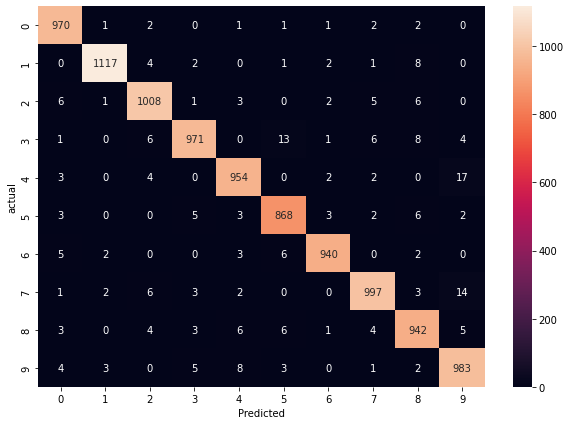

In [ ]:
# Plot CM
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('actual')